## Data Cleaning 2: missing values
### US Education dataset

In [102]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

warnings.filterwarnings('ignore')

### Upload data from sql

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### Data Columns

In [3]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [4]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


There are 25 columns, 23 of which are numeric and two object columns for state name and primary key. 

### Find missing values from data

First find the number of values by column that are NaN, and then by column what have NaN by percentage

In [5]:
for column_name in useducation_df.columns:
    print('{} {}' .format(column_name, useducation_df[column_name].isnull().sum()))

PRIMARY_KEY 0
STATE 0
YEAR 0
ENROLL 263
TOTAL_REVENUE 212
FEDERAL_REVENUE 212
STATE_REVENUE 212
LOCAL_REVENUE 212
TOTAL_EXPENDITURE 212
INSTRUCTION_EXPENDITURE 212
SUPPORT_SERVICES_EXPENDITURE 212
OTHER_EXPENDITURE 263
CAPITAL_OUTLAY_EXPENDITURE 212
GRADES_PK_G 173
GRADES_KG_G 132
GRADES_4_G 131
GRADES_8_G 131
GRADES_12_G 131
GRADES_1_8_G 131
GRADES_9_12_G 131
GRADES_ALL_G 173
AVG_MATH_4_SCORE 956
AVG_MATH_8_SCORE 960
AVG_READING_4_SCORE 959
AVG_READING_8_SCORE 994


In [6]:
useducation_df.isnull().sum()*100/useducation_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

For the object columns there appears to be no missing values, but each numeric column has missing data and the Average reading and math scores have 2/3rd of the data missing.

### Approaches to dealing with missing data

The first approach will be to see what the data looks like by deleting any rows that that have missing values. The first approach is to just remove any rows, the second approach will be to remove any from the math/reading scores that are NA to see if we can squeeze more data and take a hybrid approach.

In [7]:
#remove all NA values
grades_test = useducation_df.dropna()
grades_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 209 to 1249
Data columns (total 25 columns):
PRIMARY_KEY                     413 non-null object
STATE                           413 non-null object
YEAR                            413 non-null int64
ENROLL                          413 non-null float64
TOTAL_REVENUE                   413 non-null float64
FEDERAL_REVENUE                 413 non-null float64
STATE_REVENUE                   413 non-null float64
LOCAL_REVENUE                   413 non-null float64
TOTAL_EXPENDITURE               413 non-null float64
INSTRUCTION_EXPENDITURE         413 non-null float64
SUPPORT_SERVICES_EXPENDITURE    413 non-null float64
OTHER_EXPENDITURE               413 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      413 non-null float64
GRADES_PK_G                     413 non-null float64
GRADES_KG_G                     413 non-null float64
GRADES_4_G                      413 non-null float64
GRADES_8_G                      413 non-null flo

In [8]:
avg_remove = useducation_df[(useducation_df['AVG_MATH_4_SCORE'].notnull()) & \
                            (useducation_df['AVG_MATH_8_SCORE'].notnull()) & \
                            (useducation_df['AVG_READING_4_SCORE'].notnull()) & \
                            (useducation_df['AVG_READING_8_SCORE'].notnull())]

avg_remove.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 2 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     474 non-null object
STATE                           474 non-null object
YEAR                            474 non-null int64
ENROLL                          416 non-null float64
TOTAL_REVENUE                   423 non-null float64
FEDERAL_REVENUE                 423 non-null float64
STATE_REVENUE                   423 non-null float64
LOCAL_REVENUE                   423 non-null float64
TOTAL_EXPENDITURE               423 non-null float64
INSTRUCTION_EXPENDITURE         423 non-null float64
SUPPORT_SERVICES_EXPENDITURE    423 non-null float64
OTHER_EXPENDITURE               416 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      423 non-null float64
GRADES_PK_G                     420 non-null float64
GRADES_KG_G                     423 non-null float64
GRADES_4_G                      423 non-null float64
GRADES_8_G                      423 non-null float

Since the majority of the NA values are from the ave math/reading column focusing on just these columns gives us a marginal gain in data.

Let's look at the distribution of the columns to see how we can how we can apply imputation.

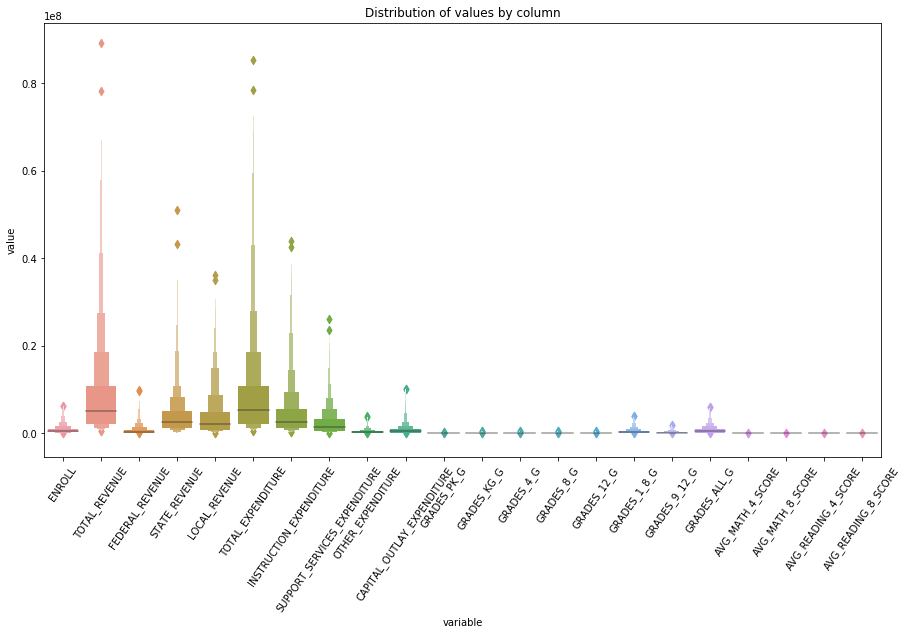

In [9]:
#plot the data in a boxenplot to see if outliers will be important

fig, ax = plt.subplots(figsize=(15,8))

#collect column names
columns = [column_name for column_name in useducation_df.columns]

#pivot the data
useducation_data = pd.melt(useducation_df,value_vars=columns[3:])

sns.boxenplot(x='variable',y='value',data=useducation_data)
ax.set_title('Distribution of values by column')

plt.xticks(rotation=55)
plt.show()


It might be good to use mean for average scores and grades since the outliers don't play a large part and the scores seem to be tightly distributed. For the revenue values median can be used or maybe not used at all.

We will use the median value for the NA's in the first 12 columns and mean in the remaining columns.

In [10]:
question_two_data = useducation_df

mean_columns = columns[12:]
med_columns = columns[3:12]

#fill w/mean
for column in mean_columns:
    question_two_data[column].fillna(question_two_data[column].mean(), inplace=True)
    
#fill w/median
for column in med_columns:
    question_two_data[column].fillna(question_two_data[column].median(), inplace=True)


In [13]:
question_two_data.isnull().sum()*100/question_two_data.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### Question 3

What happens when we factor the year into the data. Let's first look at how many years are in the data.

In [7]:
useducation_df.YEAR.unique()

array([1992, 2001, 1993, 2016, 1994, 1995, 1996, 1997, 1998, 1999, 2017,
       2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

So we have 1992 through 2015. Let's look if there are any years where the data seems to be lacking.

There appears to be a pattern with the testing scores so let's graph out one of the scores to see

In [116]:
useducation_df['AVG_READING_4_SCORE'][useducation_df['YEAR']==2003].isnull().sum()

8

In [130]:
columns = [column_name for column_name in useducation_df.columns]

TESTS = columns[21:25]
YEARS = np.sort(useducation_df.YEAR.unique())


def count_null_values(test,year,data_df):
    return data_df[test][data_df['YEAR']==year].isnull().sum()

def generate_null_cnt(tests,years,data_df):
    output={}
    
    for year in years:
        m = tuple(count_null_values(test,year,data_df) for test in tests)
        output[year] = m
    
    return output

def generate_scatter(value,value_range):
    [plt.plot(YEARS, [elem[i] for elem in value.values()]) for i in range(value_range)]
    plt.show()

In [131]:
null_cnt = generate_null_cnt(TESTS,YEARS,useducation_df)

In [132]:
null_cnt

{1992: (14, 14, 16, 48),
 1993: (56, 56, 56, 56),
 1994: (56, 56, 56, 56),
 1995: (56, 56, 56, 56),
 1996: (13, 16, 17, 19),
 1997: (57, 57, 57, 57),
 1998: (58, 58, 58, 58),
 1999: (59, 59, 59, 59),
 2000: (18, 19, 15, 16),
 2001: (59, 59, 59, 59),
 2002: (59, 59, 59, 59),
 2003: (8, 8, 8, 8),
 2004: (59, 59, 59, 59),
 2005: (8, 8, 8, 8),
 2006: (59, 59, 59, 59),
 2007: (8, 8, 8, 8),
 2008: (59, 59, 59, 59),
 2009: (7, 7, 7, 7),
 2010: (58, 58, 58, 58),
 2011: (7, 7, 7, 7),
 2012: (58, 58, 58, 58),
 2013: (7, 7, 7, 7),
 2014: (56, 56, 56, 56),
 2015: (6, 6, 6, 6),
 2016: (51, 51, 51, 51),
 2017: (0, 0, 0, 0)}

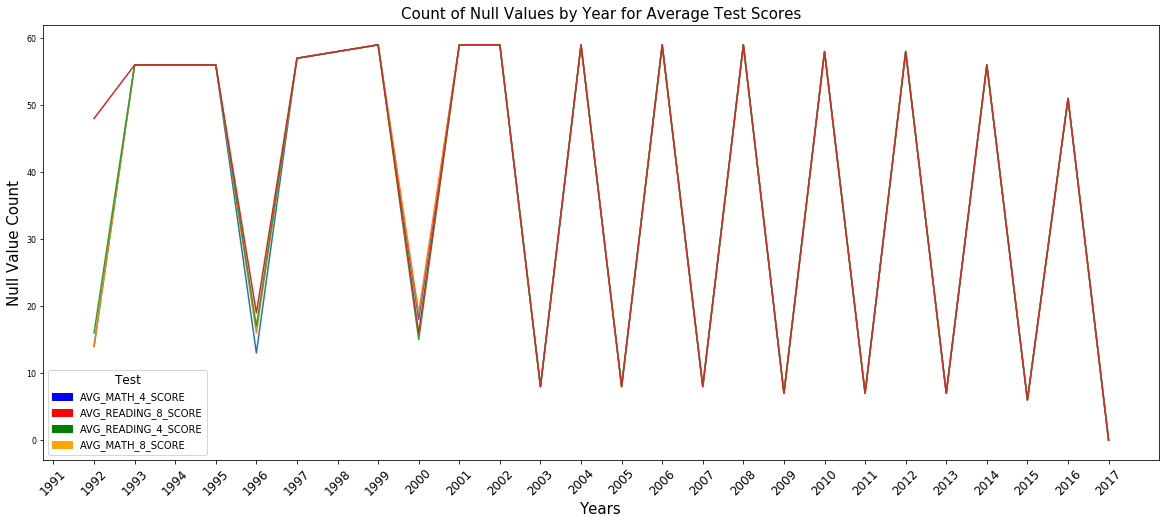

In [133]:
fig, axr = plt.subplots(figsize=(20,8))

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)             # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

axr.set_ylabel('Null Value Count')
axr.set_xlabel('Years')
axr.set_title('Count of Null Values by Year for Average Test Scores')

math_4 = mpatches.Patch(color='blue', label='AVG_MATH_4_SCORE')
reading_8 = mpatches.Patch(color='red', label='AVG_READING_8_SCORE')
reading_4 = mpatches.Patch(color='green', label='AVG_READING_4_SCORE')
math_8 = mpatches.Patch(color='orange', label='AVG_MATH_8_SCORE')

plt.legend(title='Test', loc='best', prop={'size': 10}, handles=[math_4,reading_8,reading_4,math_8])
plt.xticks(np.arange(min(YEARS)-1.0, max(YEARS)+1.0),rotation=45)

generate_scatter(null_cnt,4)

The general pattern is that the scores are tested at a frequency that started every four years and swtiched to every two years in 2003. It also looks like some states don't participate at all. What are the states that don't participate? 

In [144]:
useducation_df[useducation_df['YEAR']==2003]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
572,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,674679.0,223.344643,261.939022,207.083848,261.870872
573,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,124458.0,232.991654,279.025070,211.547154,268.772421
574,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,930090.0,228.911396,271.177350,208.872801,267.808967
575,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,417119.0,229.006589,265.771589,213.615304,264.656552
576,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,5899326.0,227.454982,267.049501,205.632437,255.073380
577,2003_COLORADO,COLORADO,2003,751049.0,6297242.0,400219.0,2715219.0,3181804.0,6685029.0,3168745.0,...,56437.0,58897.0,48924.0,460419.0,221368.0,701780.0,235.193116,283.399858,223.660982,266.228561
578,2003_CONNECTICUT,CONNECTICUT,2003,548466.0,6959891.0,351001.0,2481901.0,4126989.0,6751815.0,3721466.0,...,43494.0,45854.0,37229.0,353661.0,169409.0,534893.0,240.615242,283.729811,228.340615,268.124235
579,2003_DELAWARE,DELAWARE,2003,111282.0,1242436.0,91986.0,794472.0,355978.0,1317447.0,673997.0,...,9097.0,10222.0,7292.0,74352.0,34770.0,109764.0,235.859425,277.158369,223.928811,253.172594
580,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,5920.0,5158.0,2971.0,45706.0,16828.0,67702.0,204.919850,243.059638,188.374479,256.409625
581,2003_FLORIDA,FLORIDA,2003,2536699.0,19549835.0,1956803.0,8689141.0,8903891.0,20180142.0,9622598.0,...,178109.0,205443.0,144764.0,1590802.0,755252.0,2395642.0,233.728811,271.371490,218.014488,255.320115


It looks like the US territories don't test so let's remove these and see what that does for us. 

In [153]:
#remove territories
useducation_df_conus = useducation_df[(useducation_df.STATE != 'DOD_OVERSEAS') & \
                                      (useducation_df.STATE != 'DOD_DOMESTIC') & \
                                      (useducation_df.STATE != 'BUREAU_OF_INDIAN_AFFAIRS') & \
                                      (useducation_df.STATE != 'AMERICAN_SAMOA') & \
                                      (useducation_df.STATE != 'GUAM') & \
                                      (useducation_df.STATE != 'NORTHERN_MARIANAS') & \
                                      (useducation_df.STATE != 'PUERTO_RICO') & \
                                      (useducation_df.STATE != 'VIRGIN_ISLANDS')]

In [156]:
#drop 2017 data
useducation_df_conus = useducation_df_conus[useducation_df_conus.YEAR != 2017]

In [157]:
useducation_df_conus.isnull().sum()*100/useducation_df_conus.isnull().count()

#useducation_df_conus.info()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           6.539924
TOTAL_REVENUE                    2.661597
FEDERAL_REVENUE                  2.661597
STATE_REVENUE                    2.661597
LOCAL_REVENUE                    2.661597
TOTAL_EXPENDITURE                2.661597
INSTRUCTION_EXPENDITURE          2.661597
SUPPORT_SERVICES_EXPENDITURE     2.661597
OTHER_EXPENDITURE                6.539924
CAPITAL_OUTLAY_EXPENDITURE       2.661597
GRADES_PK_G                      6.083650
GRADES_KG_G                      4.866920
GRADES_4_G                       4.866920
GRADES_8_G                       4.866920
GRADES_12_G                      4.866920
GRADES_1_8_G                     4.866920
GRADES_9_12_G                    4.866920
GRADES_ALL_G                     6.083650
AVG_MATH_4_SCORE                63.117871
AVG_MATH_8_SCORE                63.422053
AVG_READING_4_SCORE             63

So removing the territories, and 2017 data improves the revenue data signficantly. We know that the reading scores are based on a periodic cycle now so we should not carry the reading scores as an average - but let them remain or just carry them from the previous test cycle.

Let's fill in the data using interpolation

In [162]:
useducation_interpolate = useducation_df.copy()

interp_list = columns[4:]

for column in interp_list:
    useducation_interpolate.loc[:, column].interpolate(inplace=True)

In [164]:
useducation_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

The best method in my estimation would be to factor out the US territories, and 2017 data. Then take into account that the testing happens on a periodic basis and carry testing values each year or compare the test vs. total revenue spent.